## Test 1

## 1) Importer les outils

In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt

In [0]:
import scipy.integrate as solveur

## 2) Définir les constantes du problème

In [0]:
FA0 = 15 # mol/min
FB0 = 20 # mol/min
FC0 = 0 # mol/min
FD0 = 0 # mol/min
FE0 = 0 # mol/min
FF0 = 0 # mol/min
Vdot = 10 # l/min

## 3) Définir les équations à résoudre

In [0]:
def equations (variables, V, Vdot) :
  FA, FB, FC, FD, FE, FF = variables
  
  cA = FA / Vdot
  cB = FB / Vdot
  cC = FC / Vdot
  cD = FD / Vdot
  cE = FE / Vdot
  cF = FF / Vdot
  
  r1 = 0.25 * cA * cB
  r2 = 0.1 * cA * cD
  r3 = 5 * cB**2 * cC
  
  RA = - r1 - 3 * r2
  RB = -2 * r1 - r3
  RC = r1 + r2 -2 * r3
  RD = r1 - 2 * r2 + r3
  RE = r2
  RF = r3
  
  dFAdt = RA
  dFBdt = RB
  dFCdt = RC
  dFDdt = RD
  dFEdt = RE
  dFFdt = RF
  
  return dFAdt, dFBdt, dFCdt, dFDdt, dFEdt, dFFdt

## 4) Définir les conditions initiales

In [0]:
conditions_initiales = [FA0, FB0, FC0, FD0, FE0, FF0]

## 5) Résoudre le problème à l'aide du solveur

In [0]:
V = np.arange(0, 50, 0.01) # définir les bornes d'intégration

resultats = solveur.odeint(equations, conditions_initiales, V, (Vdot,)) # 1 constante => mettre une virgule

In [0]:
FA = resultats [:,0]
FB = resultats [:,1]
FC = resultats [:,2]
FD = resultats [:,3]
FE = resultats [:,4]
FF = resultats [:,5]

In [0]:
cA = FA / Vdot
cC = FC / Vdot
cA0 = FA0 / Vdot

In [0]:
x = (cA0 - cA) / cA0

In [57]:
x[-1]

0.8226581045006099

In [58]:
cC [-1]

0.06141881805398408

## 6) Visualiser les résultats

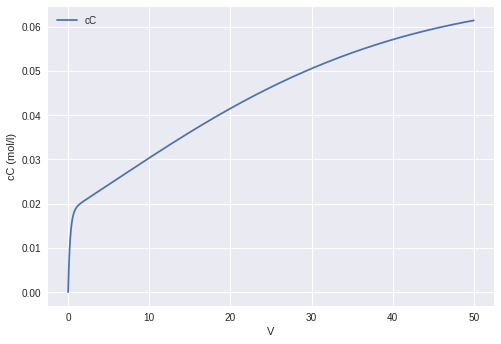

In [59]:
plt.plot(V,cC)
plt.xlabel("V")
plt.ylabel("cC (mol/l)")
plt.legend(["cC"])
plt.show()